# Student marks

En este archivo se analiza el [Student Marks Dataset](https://www.kaggle.com/datasets/yasserh/student-marks-dataset) disponible en Kaggle, publicado por Ing. M Yasser H. 

El dataset que se analizará cuenta con 3 columnas.
* number_courses: Número de cursos en los que el alumno en cuestión está enscrito actualmente. Consta de un número entero.
* time_study: Número de horas en promedio que el alumno dedica durante un día al estudio. Consta de un valor de punto flotante.
* Marks: Calificación obtenida por el alumno. Consta de un valor de punto flotante.

En este documento, se pretende hacer un análisis de las variables relevantes para la predicción de las calificaciones del estudiante, con la finalidad de implementar un modelo de regresión lineal y polinomial haciendo uso de la librería de scikit-learn. También se busca comparar el desempeño de los modelos producto de la librería con los implementados de manera manual en el entregable pasado, también disponibles en este repositorio.

Ya que la intención de este documento es practicar la implementación de metodos de ML utilizando librerías, no se ha modificado el análisis de variables o aquellas que se consideran más aptas para el entrenamiento del modelo, por lo que estas ecciones han experimentado pocos cambios.

## Préambulo
### Importación de librerías

In [64]:
# Librerías de uso general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Librerías para analisis de datos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Modelos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Lectura del archivo csv

In [65]:
df = pd.read_csv('Student_Marks.csv')

### Exploración de datos

In [66]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


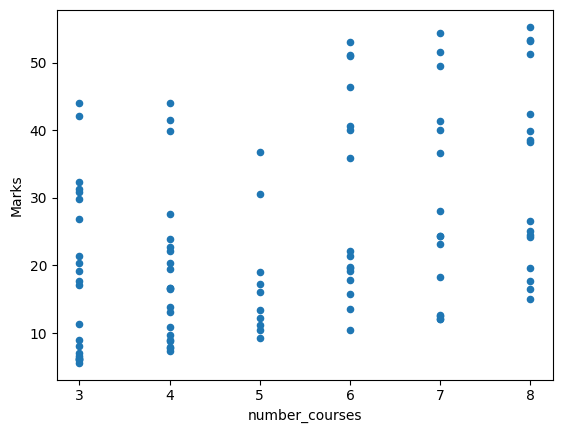

In [67]:
# Graficar el df como scatter plot
df.plot(x='number_courses', y='Marks', kind='scatter')  
plt.show()

En esta gráfica, se muestra el número de cursos contra las calificaciones del alumno. No es posible apreciar una coorrelacón fuerte entre estos datos, además de una leve dentencia hacia una mayor calificación dado un mayor número de cursos, pero no la suficiente como para considerar apropiada la inclusión de esta variable en el análisis.

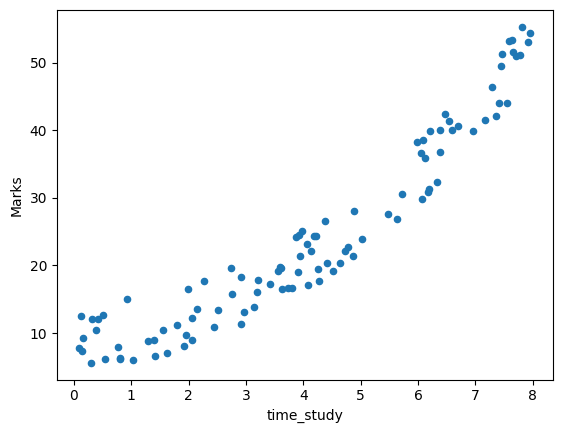

In [68]:
# Graficar el 'time_study' como scatter plot
df.plot(x='time_study', y='Marks', kind='scatter')  
plt.show()

A diferencia de el número de cursos, el tiempo de estudio parece estar fuertemente relacionado con las calificaciones del estudiante. Parece apreciarse una relación lineal, por lo que a continuación se aplicará un algoritmo de regresión lineal con la finalidad de generar un modelo que se ajuste al comportamiento de los datos.

### Partición de los datos

Se divide el conjunto de datos en dos subconjuntos para el entrenamiento y prueba de los modelos generados. Con la finalidad de ser equitativo en las pruebas, se emplean los mismos conjuntos de datos para el entrenamiento y prueba de ambos modelos.

In [69]:
time_study = np.array(df["time_study"])
marks = np.array(df["Marks"])

train_features, test_features, train_targets, test_targets = train_test_split(time_study, marks, test_size = 0.20, random_state = 42)
train_features = train_features.reshape(-1, 1)
test_features = test_features.reshape(-1, 1)

## Rasgos del análisis 

### Sesgo

El sesgo (o bias) se refiere a la tendencia con la que el modelo comete errores al realiar predicciones sobre el conjunto de datos. El sesgo se introduce en el modelo como un producto de la simplifiación de problemas complejos en modelos "simples", el sesgo de un modelo nos habla sobre la manera en la que el modelo se equivoca en comparación a los datos observados, esto puede referirse a la tendencia a sobreestimar el valor real (sesgo de sobreestimación), a subestimar el valor real (sesgo de sobreestimación) o incluso hacer referencia a que el modelo empelado no es el adecuado para describir el comportamiento de los datos.

Un modelo con un sesgo alto puede conducir a problemas de *underfitting*, en los que el modelo es incapaz de realizar predicciones adecuadas sobre el conjunto de datos sin tomar en cuenta un alto margen de error.

### Varianza

La varianza se refiere al nivel de dependencia que tiene el modelo de los datos de entrenamiento. En terminos simples, un modelo con una alta varianza, tendrá un alto grado de dependencia de los datos de entrenamiendo, es decir, que el comportamiendo del modelo dependerá en gran medida de los datos que se utilicen para el entrenamiento. 

Es importante mantener un nivel razonable de varianza ya que los valores elevados de la misma pueden llevar a *overfitting*, es decir, un modelo se adhiere a los datos de entrenamiento pero arroja resultados poco satisfactorios cuando se prueba sobre el subconjunto de prueba.

### Nivel de ajuste del modelo

El nivel de ajuste al modelo se refiere a la capacidad del modelo de describir adecuadamente el comportamiento de los datos, incluyendo los conjuntos de prueba y entrenamiento, sin caer en *underfitting* ni *overfitting*. Se busca encontrar un punto medio entre estos 2 estados que permita realizar predicciones con un margen de error satisfactorio sin ser excesivamente dependiente de los datos de entrenamiento. 

Para llegar a este punto se busca disminuir el bias lo máximo posible sin llegar a un valor de varianza elevado. A continuación se adjunta un diagrama que explica este concepto:

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*8sV6Sr9uc0Ef39YBivLzrw.jpeg" alt="Image Description" height="350">
</p>

Es decir, se busca generar un modelo lo suficientemente complejo como para adaptarse a los datos, pero no lo suficientemente complejo como para ser incapaz de realizar predicciones de datos no vistos.

## Modelos a probar

In [91]:
def getModelsMSE(degrees = 1):
    model_transform = PolynomialFeatures(degree=degrees)
    model_train_features = model_transform.fit_transform(train_features)
    model_test_features = model_transform.transform(test_features)

    model = LinearRegression()

    # Fit the model on the modelnomial features training data
    model.fit(model_train_features, train_targets)

    model_predictions_train = model.predict(model_train_features)
    model_predictions_test = model.predict(model_test_features)

    model_mse_train = mean_squared_error(train_targets, model_predictions_train)
    model_mse_test = mean_squared_error(test_targets, model_predictions_test)

    return [model_mse_train, model_mse_test]

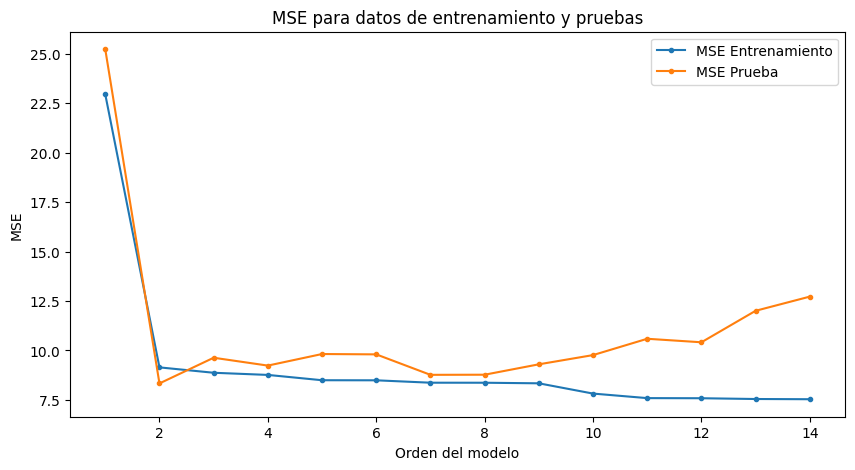

In [89]:
models_mse_train = []
models_mse_test = []
x = range(1, 15)
for i in x:
    model_mse = getModelsMSE(i)
    models_mse_train.append(model_mse[0])
    models_mse_test.append(model_mse[1])

plt.figure(figsize=(10, 5))
plt.plot(x, models_mse_train, marker='.', linestyle='-', label='MSE Entrenamiento')
plt.plot(x, models_mse_test, marker='.', linestyle='-', label='MSE Prueba')
plt.title('MSE para datos de entrenamiento y pruebas')
plt.xlabel('Orden del modelo')
plt.ylabel('MSE')
plt.legend()

# Display the plot
plt.show()

### Función Lineal

MSE subconjunto de entrenamiento:  22.957504476389232
MSE subconjunto de prueba:  25.23674562363228


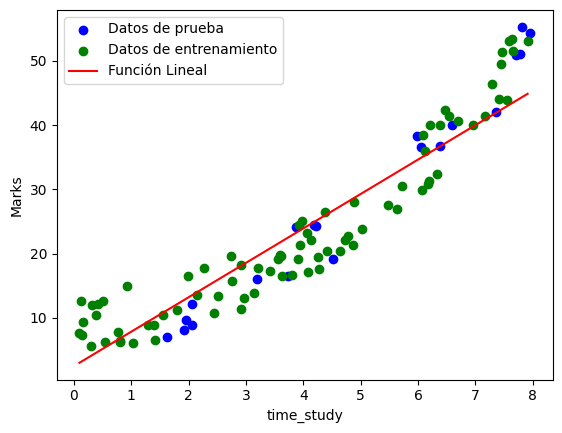

In [70]:
poly_1_transform = PolynomialFeatures(degree=1)
poly_1_train_features = poly_1_transform.fit_transform(train_features)
poly_1_test_features = poly_1_transform.transform(test_features)

poly_1_model = LinearRegression()

# Fit the model on the poly_1nomial features training data
poly_1_model.fit(poly_1_train_features, train_targets)

poly_1_predictions_train = poly_1_model.predict(poly_1_train_features)
poly_1_predictions_test = poly_1_model.predict(poly_1_test_features)

poly_1_model_mse_train = mean_squared_error(train_targets, poly_1_predictions_train)
poly_1_model_mse_test = mean_squared_error(test_targets, poly_1_predictions_test)

print("MSE subconjunto de entrenamiento: ", poly_1_model_mse_train)
print("MSE subconjunto de prueba: ", poly_1_model_mse_test)

# Se grafican los datos de prueba
plt.scatter(test_features, test_targets, label='Datos de prueba', color="blue")
plt.scatter(train_features, train_targets, label='Datos de entrenamiento', color="green")

# Genera los valores 'x' para la grafica de la predicción
x_values = np.linspace(train_features.min(), train_features.max(), 100)

# Grafica la prediccoón como una linea
plt.plot(x_values, poly_1_model.predict(poly_1_transform.transform(x_values.reshape(-1, 1))), color='red', label='Función Lineal')

plt.xlabel('time_study')
plt.ylabel('Marks')

plt.legend()

plt.show()

### Función Polinomial (Orden 2)

MSE subconjunto de entrenamiento:  9.145289506874864
MSE subconjunto de prueba:  8.333458440360832


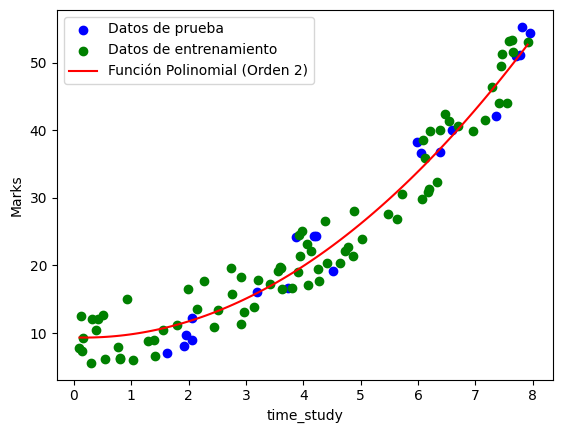

In [71]:
poly_2_transform = PolynomialFeatures(degree=2)
poly_2_train_features = poly_2_transform.fit_transform(train_features)
poly_2_test_features = poly_2_transform.transform(test_features)

poly_2_model = LinearRegression()

# Fit the model on the poly_2nomial features training data
poly_2_model.fit(poly_2_train_features, train_targets)

poly_2_predictions_train = poly_2_model.predict(poly_2_train_features)
poly_2_predictions_test = poly_2_model.predict(poly_2_test_features)

poly_2_model_mse_train = mean_squared_error(train_targets, poly_2_predictions_train)
poly_2_model_mse_test = mean_squared_error(test_targets, poly_2_predictions_test)

print("MSE subconjunto de entrenamiento: ", poly_2_model_mse_train)
print("MSE subconjunto de prueba: ", poly_2_model_mse_test)

# Se grafican los datos de prueba
plt.scatter(test_features, test_targets, label='Datos de prueba', color="blue")
plt.scatter(train_features, train_targets, label='Datos de entrenamiento', color="green")

# Genera los valores 'x' para la grafica de la predicción
x_values = np.linspace(train_features.min(), train_features.max(), 100)

# Grafica la prediccoón como una linea
plt.plot(x_values, poly_2_model.predict(poly_2_transform.transform(x_values.reshape(-1, 1))), color='red', label='Función Polinomial (Orden 2)')

plt.xlabel('time_study')
plt.ylabel('Marks')

plt.legend()

plt.show()

### Función Polinomial (Orden 15)

MSE subconjunto de entrenamiento:  7.557069792610927
MSE subconjunto de prueba:  12.244461100640475


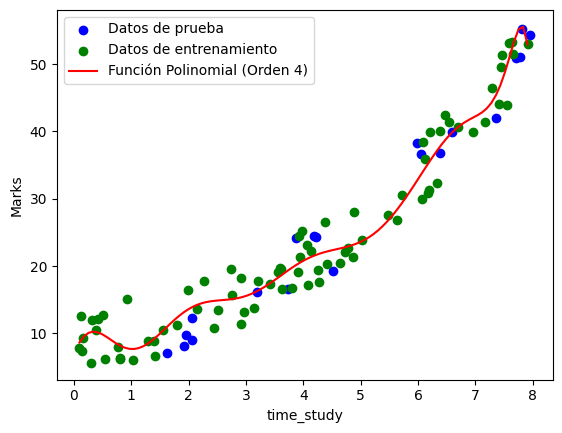

In [90]:
poly_4_transform = PolynomialFeatures(degree=15)
poly_4_train_features = poly_4_transform.fit_transform(train_features)
poly_4_test_features = poly_4_transform.transform(test_features)

poly_4_model = LinearRegression()

# Fit the model on the poly_4nomial features training data
poly_4_model.fit(poly_4_train_features, train_targets)

poly_4_predictions_train = poly_4_model.predict(poly_4_train_features)
poly_4_predictions_test = poly_4_model.predict(poly_4_test_features)

poly_4_model_mse_train = mean_squared_error(train_targets, poly_4_predictions_train)
poly_4_model_mse_test = mean_squared_error(test_targets, poly_4_predictions_test)

print("MSE subconjunto de entrenamiento: ", poly_4_model_mse_train)
print("MSE subconjunto de prueba: ", poly_4_model_mse_test)

# Se grafican los datos de prueba
plt.scatter(test_features, test_targets, label='Datos de prueba', color="blue")
plt.scatter(train_features, train_targets, label='Datos de entrenamiento', color="green")

# Genera los valores 'x' para la grafica de la predicción
x_values = np.linspace(train_features.min(), train_features.max(), 100)

# Grafica la prediccoón como una linea
plt.plot(x_values, poly_4_model.predict(poly_4_transform.transform(x_values.reshape(-1, 1))), color='red', label='Función Polinomial (Orden 4)')

plt.xlabel('time_study')
plt.ylabel('Marks')

plt.legend()

plt.show()